### Data Mining and Machine Learning
### Linear Discriminant Analysis (LDA)
#### Edgar Acuna
### Marzo 2019

In [4]:
import pandas as pd
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

### Example 1. Predicting the final grade in a class based on the scores in  Ex1 and Ex2

In [5]:
# Ejemplo1. Leyendo los datos de las notas en un curso, usando como predictoras E1 y E2
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
#df=pd.read_csv("c://PW-PR/eje1dis.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
E1      32 non-null int64
E2      32 non-null int64
PF      32 non-null int64
Nota    32 non-null object
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [6]:
df.head()

,E1,E2,PF,Nota
0,96,100,100,p
1,96,94,99,p
2,100,91,97,p
3,93,96,97,p
4,90,94,95,p


Extracting the average scores in both exams for students with final grade P

In [7]:
pasan=df[df['Nota']=="p"][["E1",'E2']]
pasan.mean()

E1    75.541667
E2    73.750000
dtype: float64

Extracting the average scores in both exams for students with final grade F

In [8]:
fail=df[df['Nota']=="f"][["E1",'E2']]
fail.mean()

E1    59.5
E2    34.0
dtype: float64

Computing the covariance matrices for each group

In [9]:
pcov=pasan.cov()
fcov=fail.cov()

Computing the coeficients of the discriminant function

In [10]:
npa=len(pasan)
nf=len(fail)
pool_cov=((npa-1)*pcov+(nf-1)*fcov)/(npa+nf-2.0)
pool_cov
mean_vec=pasan.mean()-fail.mean()
np.array(mean_vec).dot(np.linalg.inv(np.array(pool_cov)))

array([0.08415817, 0.09539823])

Computing the independent term of the discriminant function

In [11]:
mean_vec1=pasan.mean()+fail.mean()
0.5*np.array(mean_vec).dot(np.linalg.inv(np.array(pool_cov))).dot(np.array(mean_vec1))

10.82200974791381

### This is the discriminant equation $.084E1+.095E2=10.822$

In [12]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
y1=y.as_matrix()
X1=X.as_matrix()

In [13]:
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(X1,y1)
#Tasa de precision
ldadis.score(X1, y1)

0.9375

In [14]:
#Calculando las predicciones
pred=ldadis.predict(X1)

In [15]:
#Calculando los errores
error=(y1!=pred).sum()
print "Este es el numero de errores=", error

Este es el numero de errores= 2


In [16]:
#Calculando la matriz de confusion
confusion_matrix(y1,pred)

array([[ 8,  0],
       [ 2, 22]], dtype=int64)

In [17]:
error_rate=error*100/float(len(df))
print "la tasa de error es", error_rate

la tasa de error es 6.25


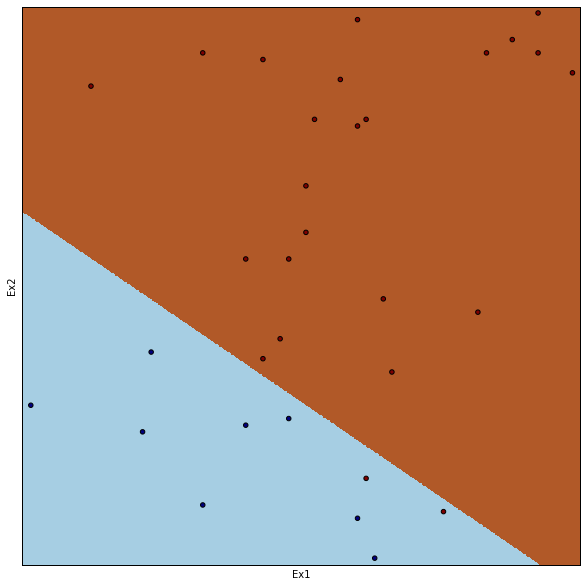

In [18]:
from matplotlib.colors import ListedColormap
ldadis = LinearDiscriminantAnalysis()
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.as_matrix()
X1=X.as_matrix()
ldadis.fit(X1,y1)
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=ldadis.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Example 2. LDA for the diabetes dataset

In [19]:
#url= "http://academic.uprm.edu/eacuna/diabetes.dat"
url="c://PW-PR/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
y=data['class']
X=data.iloc[:,0:8]
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(X,y)
#Tasa de precision
ldadis.score(X, y)

0.7838541666666666

In [20]:
#Calculando las predicciones
pred=ldadis.predict(X)
confusion_matrix(y,pred)

array([[446,  54],
       [112, 156]], dtype=int64)

In [21]:
#Estimacion de la precision using cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ldadis, X, y, cv=10)
scores

array([0.74025974, 0.75324675, 0.80519481, 0.72727273, 0.72727273,
       0.77922078, 0.80519481, 0.80519481, 0.76315789, 0.82894737])

In [22]:
print("Accuracy using LDA: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy using LDA: 0.77 (+/- 0.07)


### Example 3 : LDA for the vehicle dataset

In [23]:
#Ejemplo2. Leyendo los datos de vehiculos que tienen 4 clases y 18 predictoras
df1=pd.read_csv("c://PW-PR/vehicle.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
COMPACTNESS                  846 non-null int64
CIRCULARITY                  846 non-null int64
DISTANCE_CIRCULARITY         846 non-null int64
RADIUS_RATIO                 846 non-null int64
PR.AXIS_ASPECT_RATIO         846 non-null int64
MAX.LENGTH_ASPECT_RATIO      846 non-null int64
SCATTER_RATIO                846 non-null int64
ELONGATEDNESS                846 non-null int64
PR.AXIS_RECTANGULARITY       846 non-null int64
MAX.LENGTH_RECTANGULARITY    846 non-null int64
SCALED_VARIANCE_MAJOR        846 non-null int64
SCALED_VARIANCE_MINOR        846 non-null int64
SCALED_RADIUS_OF_GYRATION    846 non-null int64
SKEWNESS_ABOUT_MAJOR         846 non-null int64
SKEWNESS_ABOUT_MINOR         846 non-null int64
KURTOSIS_ABOUT_MAJOR         846 non-null int64
KURTOSIS_ABOUT_MINOR         846 non-null int64
HOLLOWS_RATIO                846 non-null int64
Class                        84

In [24]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df1['Class']
X=df1.iloc[:,0:18]
y1=y.as_matrix()
X1=X.as_matrix()

In [25]:
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(X1,y1)
#Tasa de precision
ldadis.score(X1, y1)

0.7978723404255319

In [26]:
#Calculando las predicciones
pred=ldadis.predict(X1)

In [27]:
confusion_matrix(y1,pred)

array([[211,   4,   0,   3],
       [  7, 133,  66,   6],
       [ 11,  57, 139,  10],
       [  2,   3,   2, 192]], dtype=int64)